# Quantitative exercise
By Group 1: Ya Ting Hu & Zhen Tian

In [1]:
import warnings
warnings.filterwarnings("ignore")

# import kaleido
import numpy as np
import pandas as pd
import random
import collections
import io
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px

from sklearn.metrics import *
from imblearn.metrics import *

import os

if not os.path.exists("fig"):
    os.mkdir("fig")

In [2]:
random.seed(1234)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
dataframe = pd.read_csv(url, header=None)
dataframe = dataframe.rename(columns={0: "age", 1: "year", 2:"nodes",3:"survival"})
dataframe["survival"].replace({2:0},inplace=True)
values = dataframe.values
X, y = values[:, :-1], values[:, -1]

report_total = pd.DataFrame()

In [3]:
def sample_class_dist(X, y, method=False, strategy=False, verbose=False):
    global report_total
    
    n_rows = X.shape[0]
    n_cols = X.shape[1]
    classes = np.unique(y)
    n_classes = len(classes)
    if method and strategy:
        print(str(" " + strategy + ": "+ method +" ").center(80, "="))
        
    
    if verbose == True:
        print('N Examples: %d' % n_rows)
        print('N Inputs: %d' % n_cols)
        print('N Classes: %d' % n_classes)
        print('Classes: %s' % classes)
    print('Class Breakdown:')

    breakdown = ''
    class_ = {}
    for c in classes:
        total = len(y[y == c])
        ratio = (total / float(len(y))) * 100
        class_[str(c)] = total
        print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

    # ratio of the number of instances from the negative class and the positive class
    try:
        print("Imbalanced ratio (IR): ", round(y.value_counts()[0]/y.value_counts()[1],2))
    except:
        print("Imbalanced ratio (IR): ", round(collections.Counter(y)[1]/collections.Counter(y)[0],2))

    if not verbose:
        df_sample = pd.DataFrame(
        {
            "strategy": [strategy]*3,
            "method":   [method]*3,
            "class":['0', '1', 'avg / total'],
            "count":[class_["0"], class_["1"], ""],
            }
        )

        df_sample.set_index(["strategy","class"], inplace=True)

        report_total = pd.concat([report_total, df_sample], axis=0)
#         display(report_total)

In [4]:
sample_class_dist(X,y, verbose=True)

N Examples: 306
N Inputs: 3
N Classes: 2
Classes: [0 1]
Class Breakdown:
 - Class 0: 81 (26.47059%)
 - Class 1: 225 (73.52941%)
Imbalanced ratio (IR):  2.78


# Split 80% 20%

In [5]:
dataframe.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
from sklearn.model_selection import train_test_split

# defining the dependent and independent variables
Xtrain = dataframe.loc[:, dataframe.columns != "survival"]
ytrain = dataframe["survival"]

X_train, X_test, y_train, y_test = train_test_split(Xtrain,ytrain, train_size=0.8, random_state=0)

data_dict = {}
strategies = []

# Original

In [7]:
strategy = "Original"
X_Original, y_Original = X_train, y_train
strategies.append(strategy)
data_dict[strategy] = [X_Original, y_Original]
sample_class_dist(X_Original, y_Original, method = "Original", strategy = strategy)

============================== Original: Original ==============================
Class Breakdown:
 - Class 0: 56 (22.95082%)
 - Class 1: 188 (77.04918%)
Imbalanced ratio (IR):  0.3


# Undersampling


In [8]:
from imblearn.under_sampling import RandomUnderSampler
strategy = "RandomUnderSampler"
rus = RandomUnderSampler(random_state=0)
X_RUS, y_RUS = rus.fit_resample(X_train, y_train)
strategies.append(strategy)
data_dict[strategy] = [X_RUS, y_RUS]
sample_class_dist(X_RUS, y_RUS, method = "Undersampling", strategy = strategy)

from imblearn.under_sampling import RepeatedEditedNearestNeighbours
strategy = "RepeatedEditedNearestNeighbours"
enn = RepeatedEditedNearestNeighbours()
X_ENN_UnderSampled, y_ENN_UnnderSampled = enn.fit_resample(X_train, y_train)
strategies.append(strategy)
data_dict[strategy] = [X_ENN_UnderSampled, y_ENN_UnnderSampled]
sample_class_dist(X_ENN_UnderSampled, y_ENN_UnnderSampled, method = "Undersampling", strategy = strategy)

from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
strategy = "NeighbourhoodCleaningRule"
strategies.append(strategy)
X_NCR_UnderSampled, y_NCR_UnnderSampled = ncr.fit_resample(X_train, y_train)
data_dict[strategy] = [X_NCR_UnderSampled, y_NCR_UnnderSampled]

sample_class_dist(X_NCR_UnderSampled, y_NCR_UnnderSampled, method = "Undersampling", strategy = strategy)

====================== RandomUnderSampler: Undersampling =======================
Class Breakdown:
 - Class 0: 56 (50.00000%)
 - Class 1: 56 (50.00000%)
Imbalanced ratio (IR):  1.0
================ RepeatedEditedNearestNeighbours: Undersampling ================
Class Breakdown:
 - Class 0: 56 (40.87591%)
 - Class 1: 81 (59.12409%)
Imbalanced ratio (IR):  0.69
=================== NeighbourhoodCleaningRule: Undersampling ===================
Class Breakdown:
 - Class 0: 56 (28.57143%)
 - Class 1: 140 (71.42857%)
Imbalanced ratio (IR):  0.4


# Oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
strategy = "RandomOverSampler"
X_OverSampled, y_OverSampled = ros.fit_resample(X_train, y_train)
data_dict[strategy] = [X_OverSampled, y_OverSampled]
sample_class_dist(X_OverSampled, y_OverSampled, method = "Oversampling", strategy = strategy)

from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
strategy = "SMOTEN"
X_SMOTEN, y_SMOTEN = sampler.fit_resample(X_train, y_train)
data_dict[strategy] = [X_SMOTEN, y_SMOTEN]
sample_class_dist(X_SMOTEN, y_SMOTEN, method = "Oversampling", strategy = strategy)

from imblearn.over_sampling import BorderlineSMOTE 
sm = BorderlineSMOTE(random_state=0)
strategy = "BorderlineSMOTE"
X_BSMOTE, y_BSMOTE = sm.fit_resample(X_train, y_train)
data_dict[strategy] = [X_BSMOTE, y_BSMOTE]
sample_class_dist(X_BSMOTE, y_BSMOTE, method = "Oversampling", strategy = strategy)

from imblearn.over_sampling import KMeansSMOTE
sm = KMeansSMOTE(random_state=0)
strategy = "KMeansSMOTE"
X_KmeansSMOTE, y_KmeansSMOTE = sm.fit_resample(X_train, y_train)
data_dict[strategy] = [X_KmeansSMOTE, y_KmeansSMOTE]
sample_class_dist(X_KmeansSMOTE, y_KmeansSMOTE, method = "Oversampling", strategy = strategy)

from imblearn.over_sampling import SVMSMOTE 
sm = SVMSMOTE(random_state=0)
strategy = "SVMSMOTE"
X_SVMSMOTE, y_SVMSMOTE = sm.fit_resample(X_train, y_train)
data_dict[strategy] = [X_SVMSMOTE, y_SVMSMOTE]
sample_class_dist(X_SVMSMOTE, y_SVMSMOTE, method = "Oversampling", strategy = strategy)

======================= RandomOverSampler: Oversampling ========================
Class Breakdown:
 - Class 0: 188 (50.00000%)
 - Class 1: 188 (50.00000%)
Imbalanced ratio (IR):  1.0
============================= SMOTEN: Oversampling =============================
Class Breakdown:
 - Class 0: 188 (50.00000%)
 - Class 1: 188 (50.00000%)
Imbalanced ratio (IR):  1.0
======================== BorderlineSMOTE: Oversampling =========================
Class Breakdown:
 - Class 0: 188 (50.00000%)
 - Class 1: 188 (50.00000%)
Imbalanced ratio (IR):  1.0
========================== KMeansSMOTE: Oversampling ===========================
Class Breakdown:
 - Class 0: 189 (50.13263%)
 - Class 1: 188 (49.86737%)
Imbalanced ratio (IR):  1.01
============================ SVMSMOTE: Oversampling ============================
Class Breakdown:
 - Class 0: 188 (50.00000%)
 - Class 1: 188 (50.00000%)
Imbalanced ratio (IR):  1.0


# Hybrid

In [10]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
strategy = "SMOTEENN"
X_Hybrid_SMOTEENN, y_Hybrid_SMOTEENN = smote_enn.fit_resample(X_train, y_train)
data_dict[strategy] = [X_Hybrid_SMOTEENN, y_Hybrid_SMOTEENN]
sample_class_dist(X_Hybrid_SMOTEENN, y_Hybrid_SMOTEENN, method = "Hybrid", strategy = strategy)

=============================== SMOTEENN: Hybrid ===============================
Class Breakdown:
 - Class 0: 100 (51.81347%)
 - Class 1: 93 (48.18653%)
Imbalanced ratio (IR):  1.08


In [11]:
report_ = pd.DataFrame()
for sampling_strategy in data_dict.keys():
    clf = DecisionTreeClassifier(random_state=0)
    y_pred = clf.fit(data_dict[sampling_strategy][0], data_dict[sampling_strategy][1]).predict(X_test)
    
    report_str = classification_report_imbalanced(y_test, y_pred)
    df_report = pd.read_csv(io.StringIO(report_str),sep="      ")
    df_report["roc_score"] = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    df_report["sampling_strategy"] = sampling_strategy
    df_report.reset_index(inplace=True)
    df_report = df_report.rename({"index":"class"},axis=1)
    df_report.set_index(["sampling_strategy", "class"], inplace=True)
#     print(sampling_strategy)
#     display(df_report)
    report_ = pd.concat([df_report,report_],axis=0)
report_total = pd.concat([report_,report_total],axis=1)

In [12]:
#Text summary of the precision, recall, specificity, geometric mean, and index balanced accuracy    
#https://imbalanced-learn.org/stable/references/generated/imblearn.metrics.classification_report_imbalanced.html#imblearn.metrics.classification_report_imbalanced

report_total.sort_values(["method","roc_score"], ascending=False)

pre   rec   spe    f1   geo  \
                                class                                       
RepeatedEditedNearestNeighbours 0            0.53  0.76  0.54  0.62  0.64   
                                1            0.77  0.54  0.76  0.63  0.64   
                                avg / total  0.67  0.63  0.67  0.63  0.64   
RandomUnderSampler              0            0.52  0.60  0.62  0.56  0.61   
                                1            0.70  0.62  0.60  0.66  0.61   
                                avg / total  0.62  0.61  0.61  0.62  0.61   
NeighbourhoodCleaningRule       0            0.54  0.52  0.70  0.53  0.60   
                                1            0.68  0.70  0.52  0.69  0.60   
                                avg / total  0.63  0.63  0.59  0.63  0.60   
KMeansSMOTE                     0            0.50  0.32  0.78  0.39  0.50   
                                1            0.63  0.78  0.32  0.70  0.50   
                                avg / total  0.58  0.60  0.51  0.57  0.50   
BorderlineSMOTE                 0            0.42  0.32  0.70  0.36  0.47   
                                1            0.60  0.70  0.32  0.65  0.47   
                                avg / total  0.53  0.55  0.47  0.53  0.47   
RandomOverSampler               0            0.42  0.20  0.81  0.27  0.40   
                                1            0.60  0.81  0.20  0.69  0.40   
                                avg / total  0.53  0.56  0.45  0.52  0.40   
SVMSMOTE                        0            0.40  0.24  0.76  0.30  0.43   
                                1            0.60  0.76  0.24  0.67  0.43   
                                avg / total  0.52  0.55  0.45  0.52  0.43   
SMOTEN                          0            0.25  0.16  0.68  0.20  0.33   
                                1            0.54  0.68  0.16  0.60  0.33   
                                avg / total  0.43  0.47  0.37  0.44  0.33   
Original                        0            0.53  0.40  0.76  0.45  0.55   
                                1            0.65  0.76  0.40  0.70  0.55   
                                avg / total  0.60  0.61  0.54  0.60  0.55   
SMOTEENN                        0            0.54  0.52  0.70  0.53  0.60   
                                1            0.68  0.70  0.52  0.69  0.60   
                                avg / total  0.63  0.63  0.59  0.63  0.60   

                                              iba   sup  roc_score  \
                                class                                
RepeatedEditedNearestNeighbours 0            0.42    25   0.650270   
                                1            0.40    37   0.650270   
                                avg / total  0.41    62   0.650270   
RandomUnderSampler              0            0.37    25   0.611351   
                                1            0.37    37   0.611351   
                                avg / total  0.37    62   0.611351   
NeighbourhoodCleaningRule       0            0.36    25   0.611351   
                                1            0.37    37   0.611351   
                                avg / total  0.37    62   0.611351   
KMeansSMOTE                     0            0.24    25   0.551892   
                                1            0.26    37   0.551892   
                                avg / total  0.25    62   0.551892   
BorderlineSMOTE                 0            0.22    25   0.510270   
                                1            0.23    37   0.510270   
                                avg / total  0.23    62   0.510270   
RandomOverSampler               0            0.15    25   0.505405   
                                1            0.17    37   0.505405   
                                avg / total  0.16    62   0.505405   
SVMSMOTE                        0            0.17    25   0.498378   
                                1            0.19    37   0.498378   
                                avg / tot

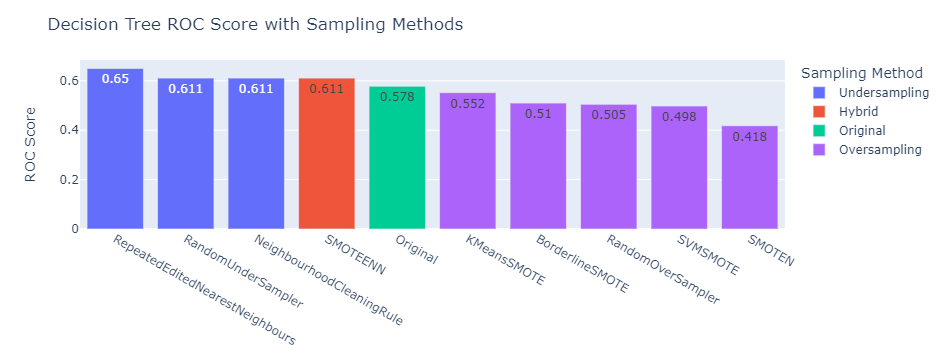

In [20]:
bar_report = report_total.reset_index()[["level_0", "roc_score", "method"]].drop_duplicates().sort_values("roc_score", ascending=False)
bar_report['roc_score']=round(bar_report['roc_score'],3)
fig = px.bar(bar_report,color="method",y="roc_score", x="level_0",text="roc_score")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_title=None,title ="Decision Tree ROC Score with Sampling Methods", yaxis_title="ROC Score", legend_title="Sampling Method")

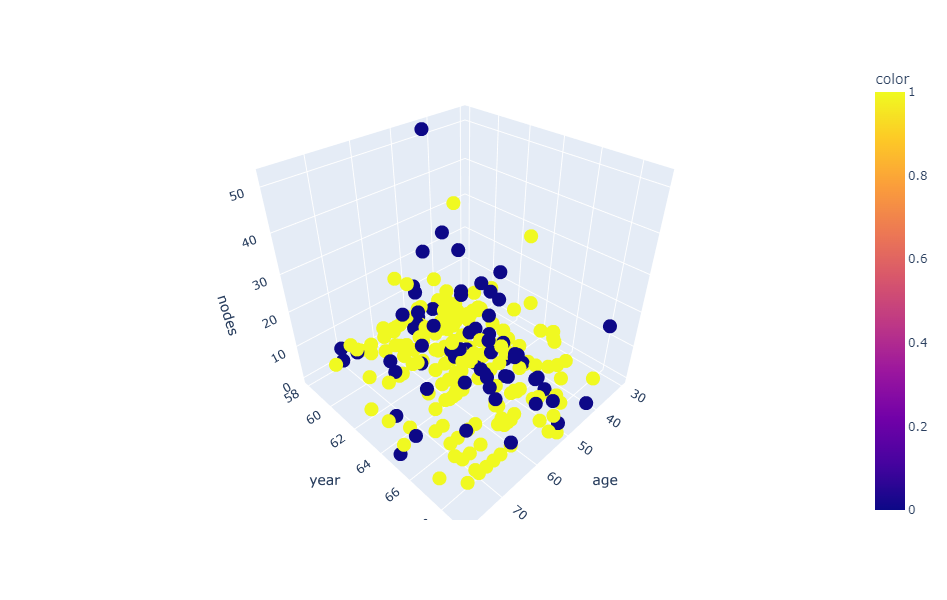

In [14]:
fig = px.scatter_3d(X_SMOTEN, x='age', y='year', z='nodes',
              color=y_SMOTEN,width=1000,height=600,size_max=2)
fig.show()

##### Logistic

In [15]:
# Xtest = test.loc[:, train.columns != "survival"]
# ytest = test["survival"]

# import statsmodels.api as sm
# import pandas as pd
 
# # defining the dependent and independent variables
# Xtrain = train.loc[:, train.columns != "survival"]
# ytrain = train["survival"]
  
# # building the model and fitting the data
# log_reg = sm.Logit(ytrain, Xtrain).fit();

# # performing predictions on the test datdaset
# yhat = log_reg.predict(Xtest)
# prediction = list(map(round, yhat))
 
# # comparing original and predicted values of y
# print('Actual values', list(ytest.values))
# print('Predictions :', prediction)

In [16]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score,roc_curve, auc

# clf_LogisticRegression = LogisticRegression(random_state=0).fit(Xtrain, ytrain)
# y_score = clf_LogisticRegression.decision_function(Xtest)
# pred_prob1 = clf_LogisticRegression.predict_proba(Xtest)



In [17]:
# y_score = clf.decision_function(Xtest)
# pred_prob1 = clf.predict_proba(Xtest)
# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=1)
# # fpr2, tpr2, thresh2 = roc_curve(ytest, pred_prob2[:,1], pos_label=1)

# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(ytest))]
# p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

# # auc scores
# auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])
# # auc_score2 = roc_auc_score(ytest, pred_prob2[:,1])

# print("Auc score Logistic Regression:", auc_score1)

In [18]:
# # matplotlib
# import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# # plot roc curves
# plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# # plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# # plt.savefig('ROC',dpi=300)
# plt.show();